In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
from dance_evaluation import *
import matplotlib.pyplot as plt

### Both Foot Onsets

In [25]:
base_dir = "foot"
sub_dir = "Z"

df_feetz_z1 = pd.read_csv(f"./log01/{base_dir}/{sub_dir}/foot_z_zero_uni_50_150.csv")
df_feetz_z2 = pd.read_csv(f"./log01/{base_dir}/{sub_dir}/foot_z_zero_bi_50_150.csv")

df_feetz_p1 = pd.read_csv(f"./log01/{base_dir}/{sub_dir}/foot_z_peak_uni_50_150.csv")
df_feetz_p2 = pd.read_csv(f"./log01/{base_dir}/{sub_dir}/foot_z_peak_bi_50_150.csv")

df_feetz_bf = pd.read_csv(f"./log01/{base_dir}/{sub_dir}/foot_z_zero_bothfeet_50_150.csv")

ref = df_feetz_p2["bpm"].to_numpy()

tempoA_p1 = df_feetz_p1["tempoA"].to_numpy()
tempoA_p2 = df_feetz_p2["tempoA"].to_numpy()
tempoA_z1 = df_feetz_z1["tempoA"].to_numpy()
tempoA_z2 = df_feetz_z2["tempoA"].to_numpy()

tempoB_z1 = df_feetz_z1["tempoB"].to_numpy()
tempoB_z2 = df_feetz_z2["tempoB"].to_numpy()
tempoB_p1 = df_feetz_p1["tempoB"].to_numpy()
tempoB_p2 = df_feetz_p2["tempoB"].to_numpy()

tempoA_bf = df_feetz_bf["tempoA"].to_numpy()
tempoB_bf = df_feetz_bf["tempoB"].to_numpy()

In [26]:
experiments = {
    "peak_uni": [tempoA_p1, tempoB_p1],  
    "peak_bi": [tempoA_p2, tempoB_p2],
    "zero_uni": [tempoA_z1, tempoB_z1],
    "zero_bi": [tempoA_z2, tempoB_z2],
    "both_feet": [tempoA_bf, tempoB_bf]
}

method_labels = ["Method-1", "Method-2"]
results = {"experiment": [], "method": [],"acc1":[], "acc2": [], 
           "hits_idx": [], "hits_dbl_idx": [], "hits_hf_idx": [] }

tolerance = 8
for exp_name, data in experiments.items():
    for mlabel, calculated in zip(method_labels, data):
        metrics, hits_idx, hits_dbl_idx, hits_hf_idx = calculate_metrics_with_oe(ref, calculated, tolerance = tolerance)
        
        results["experiment"].append(exp_name)
        results["method"].append(mlabel)
        results["acc1"].append(metrics["acc1"])
        results["acc2"].append(metrics["acc2"])
        
        results["hits_idx"].append(hits_idx)
        results["hits_dbl_idx"].append(hits_dbl_idx)
        results["hits_hf_idx"].append(hits_hf_idx)
        
results_df = pd.DataFrame(results)
results_df.to_csv(f'./log01/{base_dir}/plots/{base_dir}_{sub_dir}_acc.csv')

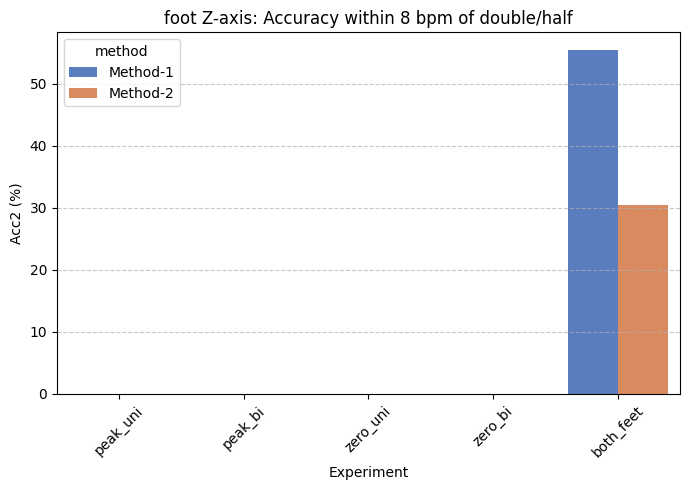

In [27]:
# Plot using Seaborn
plt.figure(figsize=(7, 5))  # Adjust figure size for better readability
sns.barplot(data=results_df, x="experiment", y="acc1", palette="muted", hue="method")

# Customize plot
plt.xlabel("Experiment")
plt.ylabel("Acc2 (%)")
plt.title(f"{base_dir} Z-axis: Accuracy within {tolerance} bpm of double/half")
plt.xticks(rotation=45)  # Rotate labels if necessary
# plt.ylim(0, 100)  # Set consistent y-axis limits
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and display the plot
plt.tight_layout()
# plt.savefig('./plots/feetz_acc2.png')
# plt.savefig(f'./log01/{base_dir}/plots/{base_dir}_{sub_dir}_acc.png')
plt.show()